In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df_DA=pd.read_csv("gsearch_jobs.csv",index_col=0)

In [4]:
df_DA.shape

(61953, 26)

In [5]:
df_DA.head()

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,True,101K–143K a year,data analyst,2023-08-04 03:00:13.797776,United States,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-04 03:00:13.797776,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,18 hours ago,Full-time,NaN,NaN,data analyst,2023-08-04 03:00:13.797776,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,12 hours ago,Contractor,True,15–25 an hour,data analyst,2023-08-04 03:00:13.797776,United States,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,7 hours ago,Contractor,NaN,90K–110K a year,data analyst,2023-08-04 03:00:13.797776,United States,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


## Data Cleaning

In [6]:
# Drop irrelevant columns
df_DA.drop(columns=['index','commute_time','salary','extensions','posted_at'],axis=1,inplace=True)

df_DA.sort_values(by='date_time',inplace=True)

In [7]:
df_DA.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'job_id',
       'thumbnail', 'schedule_type', 'work_from_home', 'search_term',
       'date_time', 'search_location', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [8]:
df_DA = df_DA.rename(columns={'title' : 'job_title',
                      'description' : 'job_description',
                      'search_term' : 'job_Title_short',
                      'search_location' : 'country',
                      'description_tokens' : 'job_skills'
                      })

In [9]:
df_DA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61953 entries, 61692 to 511
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_title            61953 non-null  object 
 1   company_name         61953 non-null  object 
 2   location             61916 non-null  object 
 3   via                  61944 non-null  object 
 4   job_description      61953 non-null  object 
 5   job_id               61953 non-null  object 
 6   thumbnail            38194 non-null  object 
 7   schedule_type        61707 non-null  object 
 8   work_from_home       27980 non-null  object 
 9   job_Title_short      61953 non-null  object 
 10  date_time            61953 non-null  object 
 11  country              61953 non-null  object 
 12  salary_pay           10088 non-null  object 
 13  salary_rate          10088 non-null  object 
 14  salary_avg           10088 non-null  float64
 15  salary_min           9512 non-null   fl

In [10]:
df_DA.head()

,job_title,company_name,location,via,job_description,job_id,thumbnail,schedule_type,work_from_home,job_Title_short,date_time,country,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,job_skills
61692,Data Analyst II,EDWARD JONES,"Bates City, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,NaN,Full-time,NaN,data analyst,2022-11-04 03:40:11.151943,United States,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['power_bi', 'excel', 'sas', 'snowflake', 'sql..."
39666,Data Analyst III - Full Time - Days,Mercy,"Springfield, MO",via Careers At Mercy,We’re a Little Different\n\nOur mission is cle...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUlJIC0gRn...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Full-time,NaN,data analyst,2022-11-04 03:40:11.151943,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'word', 'excel', 'go', 'outlook']"
61626,DATA ANALYST w/INFORMATICA EXPERIENCE,Business Advisory Solutions Group (BASG),United States,via Big Country Jobs,Business Advisory Solutions Group (BASG) is se...,eyJqb2JfdGl0bGUiOiJEQVRBIEFOQUxZU1Qgdy9JTkZPUk...,NaN,Full-time,NaN,data analyst,2022-11-04 03:40:11.151943,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
52121,Data Analyst I,Neogen Corporation,Anywhere,via LinkedIn,It's fun to work in a company where people tru...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSSIsImh0aW...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Full-time,True,data analyst,2022-11-04 03:40:11.151943,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
56772,Data Analyst,Labcorp,Anywhere,via LinkedIn,Recognized as one of Fortune magazine's 2021 W...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,Full-time,True,data analyst,2022-11-04 03:40:11.151943,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'excel', 'vba', 'go', 'sap', 'outlook..."


In [11]:
type(df_DA['job_skills'][0])

str

In [12]:
# Convert date_time to datetime format
df_DA['date_time']=pd.to_datetime(df_DA['date_time'])

# Convert job_skills from str to list
df_DA['job_skills']=df_DA['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills )


# Top Companies Analysis

In [13]:
# Calculate the frequencies of top 10 companies
top_companies_count = df_DA['company_name'].value_counts().reset_index().head(10)
top_companies_count.columns=['company_name','count']

top_companies_count

,company_name,count
0,Upwork,7533
1,Talentify.io,2118
2,Walmart,1829
3,vmysmartpros,1415
4,Dice,862
5,EDWARD JONES,747
6,Corporate,612
7,Cox Communications,538
8,Insight Global,483
9,iSay,353


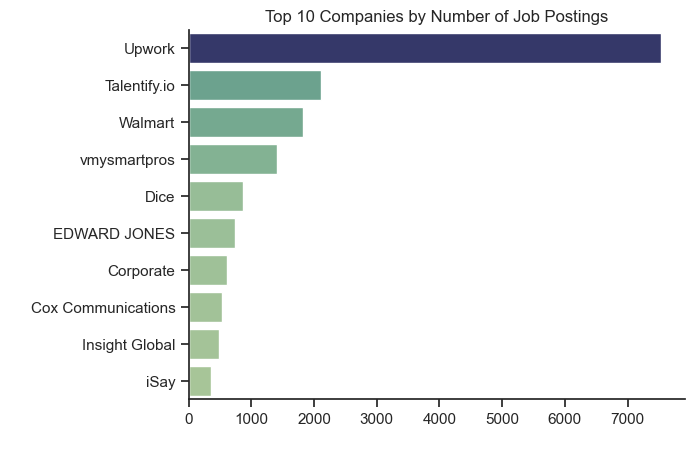

In [14]:
# Visualize the top 10 companies
sns.set_theme(style='ticks')
palette = sns.color_palette("crest", as_cmap=True)
sns.barplot(data = top_companies_count , x = 'count', y = 'company_name', hue = 'count' , palette =palette )
sns.despine()
plt.legend().remove()
plt.title("Top 10 Companies by Number of Job Postings")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

# Top Job Source Analysis

In [15]:
# Replace NaN with empty string
# Ensure all entries start with 'via ' for consistent formatting
df_DA['via'] = df_DA['via'].fillna('').apply(
    lambda x : x if 'via' in x else 'via ' + x
)

In [16]:
# Calculate the frequencies of top 6 job source
top_vias_count = df_DA['via'].value_counts().reset_index().head(6)
top_vias_count.columns=['via','count']

top_vias_count

,via,count
0,via LinkedIn,22399
1,via BeBee,8315
2,via Upwork,7505
3,via ZipRecruiter,3171
4,via Trabajo.org,3117
5,via Indeed,2051


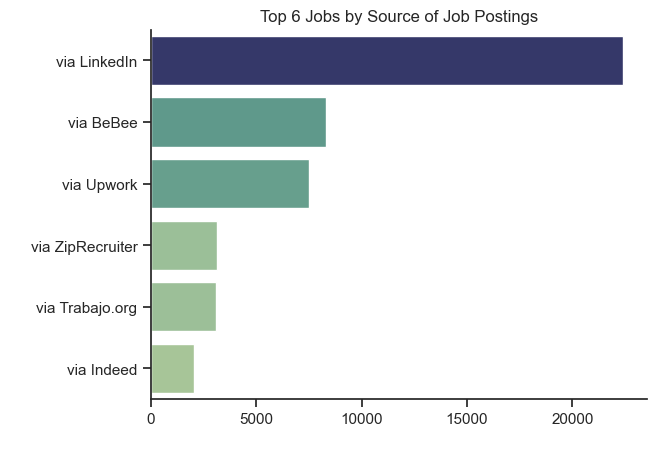

In [17]:
# Visualize the top 6 job source
sns.set_theme(style='ticks')
palette = sns.color_palette("crest", as_cmap=True)
sns.barplot(data = top_vias_count , x = 'count', y = 'via', hue = 'count' , palette=palette)
sns.despine()
plt.legend().remove()
plt.title("Top 6 Jobs by Source of Job Postings")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

# Top Locations Analysis

In [18]:
# Calculate the frequencies of top 6 job locations
top_locations_count = df_DA['location'].value_counts().reset_index().head(6)
top_locations_count.columns=['location','count']

top_locations_count

,location,count
0,Anywhere,18067
1,United States,10011
2,Anywhere,9915
3,United States,5547
4,"Denver, CO",1062
5,"Oklahoma City, OK",1028


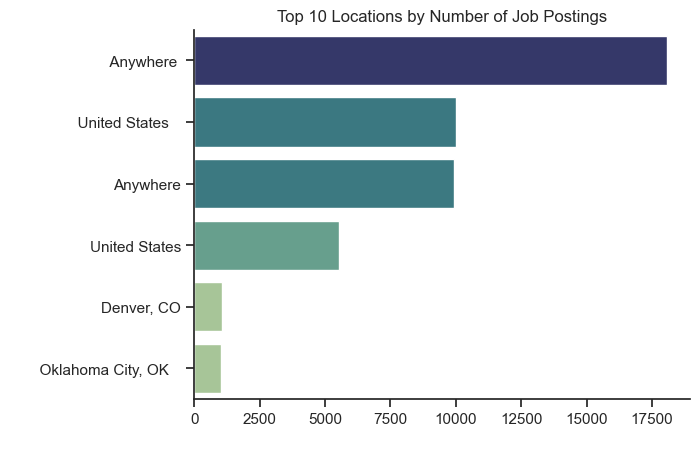

In [19]:
# Visualize the top 6 job locations
sns.set_theme(style = 'ticks')
palette = sns.color_palette("crest", as_cmap=True)
sns.barplot(data = top_locations_count , x = 'count', y = 'location', hue = 'count' , palette=palette)
sns.despine()
plt.legend().remove()
plt.title("Top 10 Locations by Number of Job Postings")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

# Top Schedules Analysis

In [20]:
# Calculate the frequencies of top 5 schedules type
schedule_counts = df_DA['schedule_type'].value_counts().reset_index().head(5)
schedule_counts.columns=['schedule_type','count']

schedule_counts

,schedule_type,count
0,Full-time,45082
1,Contractor,9284
2,Contractor and Temp work,3130
3,Full-time and Part-time,1187
4,Part-time,1144


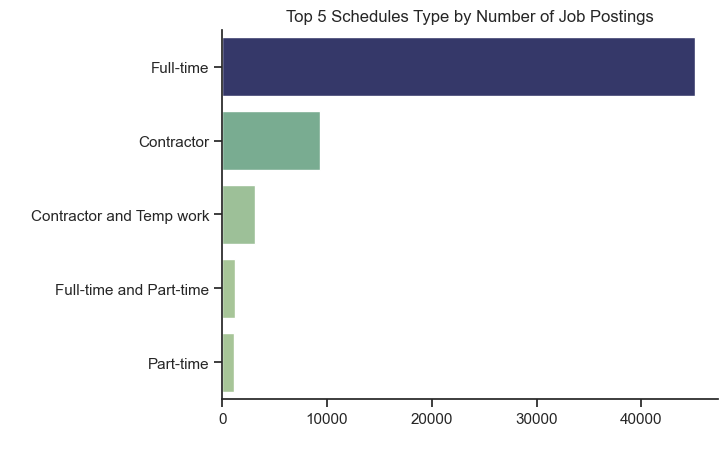

In [21]:
# Visualize the top 5 schedules type
sns.set_theme(style='ticks')
palette = sns.color_palette("crest", as_cmap=True)
sns.barplot(data = schedule_counts , x = 'count', y = 'schedule_type', hue = 'count' , palette = palette)
sns.despine()
plt.legend().remove()
plt.title("Top 5 Schedules Type by Number of Job Postings")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

# IS Work from Home?

In [22]:
# Replace NAN with false 
df_DA['work_from_home'] = df_DA['work_from_home'].fillna("False")

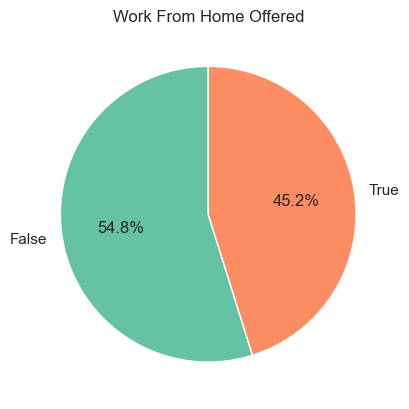

In [23]:
# Visualization
counts = df_DA['work_from_home'].value_counts()

colors = sns.color_palette("Set2" , n_colors = 2)
plt.pie(counts.values, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=colors
        )

plt.title("Work From Home Offered")
plt.show()